<a href="https://colab.research.google.com/github/istiaqahmedfahim/cloud_workload_forecasting/blob/main/Fine_Tuning_proposed_model2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pylab
import matplotlib.pyplot as plt
from matplotlib.pylab import rcParams
import tensorflow as tf
rcParams['figure.figsize'] = 20, 16

In [12]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM, Flatten
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
#from keras.callbacks import EarlyStopping
from keras.layers import ConvLSTM2D

In [4]:
df = pd.read_csv("/content/43.csv")
df

,Timestamp [ms],CPU cores,CPU capacity provisioned [MHZ],CPU usage [MHZ],CPU usage [%],Memory capacity provisioned [KB],Memory usage [KB],Disk read throughput [KB/s],Disk write throughput [KB/s],Network received throughput [KB/s],Network transmitted throughput [KB/s]
0,1376314846,2,5851.998636,3.901332,0.066667,2097152.0,106254.133333,7.933333,1.066667,0.000000,0.000000
1,1376315146,2,5851.998636,0.000000,0.000000,2097152.0,79689.600000,0.000000,1.000000,0.000000,0.000000
2,1376315446,2,5851.998636,9.753331,0.166667,2097152.0,62912.000000,0.000000,0.066667,0.000000,0.000000
3,1376315746,2,5851.998636,0.000000,0.000000,2097152.0,97865.333333,0.000000,0.066667,0.000000,0.000000
4,1376316046,2,5851.998636,0.000000,0.000000,2097152.0,127225.333333,1.933333,0.333333,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...
8627,1378905598,2,5851.998944,76.075986,1.300000,2097152.0,329950.133333,0.333333,561.866667,581.800000,18.400000
8628,1378905898,2,5851.998944,54.618657,0.933333,2097152.0,244665.333333,1.800000,1.133333,2.466667,1.066667
8629,1378906198,2,5851.998944,58.519989,1.000000,2097152.0,139808.800000,0.200000,0.866667,2.400000,1.066667
8630,1378906498,2,5851.998944,325.761275,5.566667,2097152.0,325755.733333,1029.666667,55.466667,2.466667,1.533333


In [5]:
Sum_disk=(df["Disk read throughput [KB/s]"] + df["Disk write throughput [KB/s]"])
df["Disk I/O"]=Sum_disk
df["Disk I/O"]=((df["Disk I/O"]-df["Disk I/O"].min())/(df["Disk I/O"].max()-df["Disk I/O"].min()))*20
df

,Timestamp [ms],CPU cores,CPU capacity provisioned [MHZ],CPU usage [MHZ],CPU usage [%],Memory capacity provisioned [KB],Memory usage [KB],Disk read throughput [KB/s],Disk write throughput [KB/s],Network received throughput [KB/s],Network transmitted throughput [KB/s],Disk I/O
0,1376314846,2,5851.998636,3.901332,0.066667,2097152.0,106254.133333,7.933333,1.066667,0.000000,0.000000,0.022571
1,1376315146,2,5851.998636,0.000000,0.000000,2097152.0,79689.600000,0.000000,1.000000,0.000000,0.000000,0.002508
2,1376315446,2,5851.998636,9.753331,0.166667,2097152.0,62912.000000,0.000000,0.066667,0.000000,0.000000,0.000167
3,1376315746,2,5851.998636,0.000000,0.000000,2097152.0,97865.333333,0.000000,0.066667,0.000000,0.000000,0.000167
4,1376316046,2,5851.998636,0.000000,0.000000,2097152.0,127225.333333,1.933333,0.333333,0.000000,0.000000,0.005684
...,...,...,...,...,...,...,...,...,...,...,...,...
8627,1378905598,2,5851.998944,76.075986,1.300000,2097152.0,329950.133333,0.333333,561.866667,581.800000,18.400000,1.409906
8628,1378905898,2,5851.998944,54.618657,0.933333,2097152.0,244665.333333,1.800000,1.133333,2.466667,1.066667,0.007356
8629,1378906198,2,5851.998944,58.519989,1.000000,2097152.0,139808.800000,0.200000,0.866667,2.400000,1.066667,0.002675
8630,1378906498,2,5851.998944,325.761275,5.566667,2097152.0,325755.733333,1029.666667,55.466667,2.466667,1.533333,2.721338


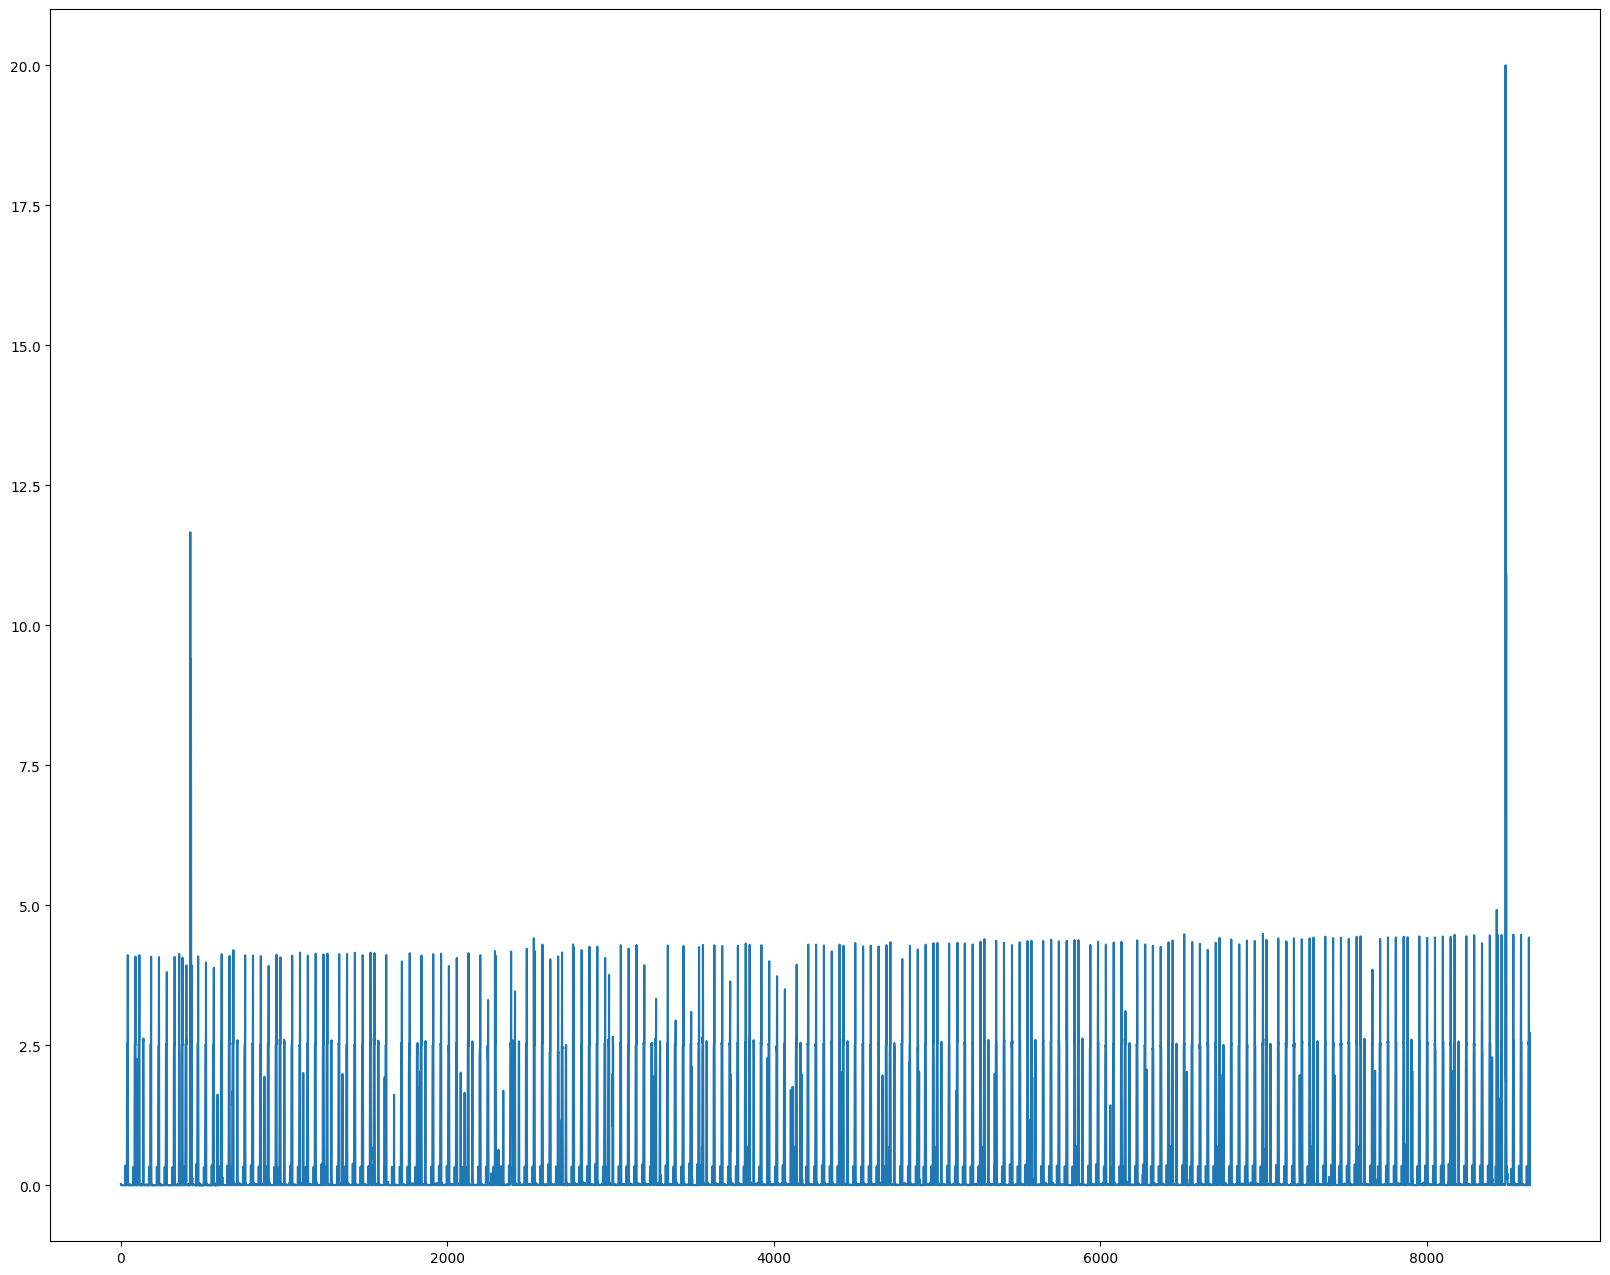

In [6]:
df1 = df['Disk I/O']
df1=df1.to_frame()
plt.plot(df1)
dataset = df1.values
dataset = dataset.astype('float32') #COnvert values to float

In [7]:
scaler = MinMaxScaler(feature_range=(0, 1)) #Also try QuantileTransformer
dataset = scaler.fit_transform(dataset)

In [8]:
def to_sequences(dataset, seq_size):
    x = []
    y = []

    for i in range(len(dataset)-seq_size-1):
        #print(i)
        window = dataset[i:(i+seq_size), 0]
        x.append(window)
        y.append(dataset[i+seq_size, 0])

    return np.array(x),np.array(y)

In [9]:
import tensorflow as tf
from tensorflow.keras.layers import Conv1D
from tensorflow.keras.layers import Bidirectional, LSTM, Dense
from tensorflow.keras.layers import Layer, Attention

class AttentionLayer(Layer):
    def __init__(self, **kwargs):
        super(AttentionLayer, self).__init__(**kwargs)

    def build(self, input_shape):
        self.W_q = self.add_weight(name="W_q", shape=(input_shape[-1], input_shape[-1]), initializer="uniform", trainable=True)
        self.W_k = self.add_weight(name="W_k", shape=(input_shape[-1], input_shape[-1]), initializer="uniform", trainable=True)
        self.V = self.add_weight(name="V", shape=(input_shape[-1], 1), initializer="uniform", trainable=True)
        super(AttentionLayer, self).build(input_shape)

    def call(self, x):
        q = tf.matmul(x, self.W_q)
        k = tf.matmul(x, self.W_k)
        scores = tf.matmul(tf.nn.tanh(q + k), self.V)
        attention_weights = tf.nn.softmax(scores, axis=-2)
        context_vector = attention_weights * x
        return context_vector

    def compute_output_shape(self, input_shape):
        return input_shape


 # Replace with your sequence size
def create_model(seq_size):
    model = tf.keras.models.Sequential([
        tf.keras.layers.Conv1D(filters=64, kernel_size=5, strides=1, padding="causal", activation="relu", input_shape=[None, seq_size]),
        tf.keras.layers.LSTM(64, activation="relu", return_sequences=True),
        tf.keras.layers.LSTM(64, activation="relu", return_sequences=True),
        tf.keras.layers.GRU(64, activation="relu", return_sequences=True),
        AttentionLayer(),  # Add Attention Layer
        tf.keras.layers.Bidirectional(LSTM(50, activation="relu")),  # Return sequences here
        tf.keras.layers.Dense(1, 'linear')
    ])
    model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae', 'mse'])
    return model

In [16]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Conv1D(filters=64,kernel_size=5,
                      strides=1, padding="causal",
                      activation="relu",
                      input_shape=[None, seq_size]),
  tf.keras.layers.Bidirectional(LSTM(64, activation='relu',return_sequences=True)),
  tf.keras.layers.LSTM(64,activation="relu", return_sequences=True),
  tf.keras.layers.LSTM(64,activation="relu", return_sequences=True),
  tf.keras.layers.GRU(64,activation="relu", return_sequences=True),
  tf.keras.layers.LSTM(50,activation="relu"),
  tf.keras.layers.Dense(1,'linear')
])

In [20]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Conv1D(filters=64,kernel_size=5,
                      strides=1, padding="causal",
                      activation="relu",
                      input_shape=[None, seq_size]),
  tf.keras.layers.Bidirectional(LSTM(64, activation='relu')),
  tf.keras.layers.Dense(1,'linear')
])

In [10]:
from sklearn.metrics import mean_absolute_error
from tensorflow.keras.models import load_model
from tensorflow.keras.callbacks import ModelCheckpoint
import math
custom_objects = {"AttentionLayer": AttentionLayer}
param_grid = {
    'split_ratio':[0.75],   #Different split ratio
    'seq_size': [30,60,90]  # Different window sizes
}
# Initialize lists to store results
results = []
for split_ratio in param_grid['split_ratio']:
    for seq_size in param_grid['seq_size']:
        train_size = int(len(dataset) * split_ratio)
        test_size = len(dataset) - train_size
        train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
        trainX, trainY = to_sequences(train, seq_size)
        testX, testY = to_sequences(test, seq_size)
        # Reshape input to be [samples, time steps, features]
        trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
        testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))
        # Define the ModelCheckpoint callback
        checkpoint_path = "best_model.h5"
        checkpoint = ModelCheckpoint(checkpoint_path, monitor='val_mae', verbose=1, save_best_only=True, mode='min')
        #call the model creation function
        model1= create_model(seq_size)
        history = model1.fit(trainX, trainY, validation_data=(testX, testY),batch_size=64,
              verbose=2, epochs=300,callbacks=[checkpoint])
        # load the best model
        with tf.keras.utils.custom_object_scope(custom_objects):
           best_model = load_model(checkpoint_path,compile=False)
        # Predict on test set
        trainPredict = best_model.predict(trainX)
        testPredict = best_model.predict(testX)
        # inverse transform
        trainPredict = scaler.inverse_transform(trainPredict)
        trainY = scaler.inverse_transform([trainY])
        testPredict = scaler.inverse_transform(testPredict)
        testY = scaler.inverse_transform([testY])
        # Calculate metrics
        mse = mean_squared_error(trainY[0],trainPredict[:,0])
        test_mse = mean_squared_error(testY[0],testPredict[:,0])
        mae = mean_absolute_error(trainY[0],trainPredict[:,0])
        test_mae = mean_absolute_error(testY[0],testPredict[:,0])
        rmse = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
        test_rmse = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))

        print(f"Train Size: {split_ratio},Sequence Size: {seq_size},MSE: {mse} ,TestMSE: {test_mse},MAE: {mae}, TestMAE: {test_mae}, RMSE: {rmse},TestRMSE: {test_rmse}")
        results.append({'split_ratio': split_ratio,'seq_size': seq_size, 'mse': mse,'test_mse': test_mse, 'mae': mae,'test_mae': test_mae, 'rmse': rmse,'test_rmse': test_rmse})

# Print results
for result in results:
    print(f"Train Size: {result['split_ratio']},Sequence Size: {result['seq_size']}, MSE: {result['mse']},Test_MSE: {result['test_mse']}, MAE: {result['mae']},Test_MAE: {result['test_mae']}, RMSE: {result['rmse']},Test_RMSE: {result['test_rmse']}")

Epoch 1/300

Epoch 1: val_mae improved from inf to 0.03203, saving model to best_model.h5
101/101 - 9s - loss: 0.0025 - mae: 0.0337 - mse: 0.0025 - val_loss: 0.0030 - val_mae: 0.0320 - val_mse: 0.0030 - 9s/epoch - 90ms/step
Epoch 2/300


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(



Epoch 2: val_mae improved from 0.03203 to 0.01159, saving model to best_model.h5
101/101 - 2s - loss: 0.0011 - mae: 0.0171 - mse: 0.0011 - val_loss: 0.0013 - val_mae: 0.0116 - val_mse: 0.0013 - 2s/epoch - 18ms/step
Epoch 3/300

Epoch 3: val_mae did not improve from 0.01159
101/101 - 1s - loss: 7.2130e-04 - mae: 0.0126 - mse: 7.2130e-04 - val_loss: 0.0012 - val_mae: 0.0135 - val_mse: 0.0012 - 990ms/epoch - 10ms/step
Epoch 4/300

Epoch 4: val_mae did not improve from 0.01159
101/101 - 1s - loss: 6.6847e-04 - mae: 0.0116 - mse: 6.6847e-04 - val_loss: 0.0011 - val_mae: 0.0119 - val_mse: 0.0011 - 955ms/epoch - 9ms/step
Epoch 5/300

Epoch 5: val_mae improved from 0.01159 to 0.01070, saving model to best_model.h5
101/101 - 1s - loss: 6.2791e-04 - mae: 0.0116 - mse: 6.2791e-04 - val_loss: 0.0010 - val_mae: 0.0107 - val_mse: 0.0010 - 1s/epoch - 10ms/step
Epoch 6/300

Epoch 6: val_mae did not improve from 0.01070
101/101 - 1s - loss: 6.1136e-04 - mae: 0.0109 - mse: 6.1136e-04 - val_loss: 9.9732

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(



Epoch 2: val_mae improved from 0.03399 to 0.01840, saving model to best_model.h5
101/101 - 1s - loss: 0.0014 - mae: 0.0208 - mse: 0.0014 - val_loss: 0.0014 - val_mae: 0.0184 - val_mse: 0.0014 - 1s/epoch - 10ms/step
Epoch 3/300

Epoch 3: val_mae improved from 0.01840 to 0.01164, saving model to best_model.h5
101/101 - 1s - loss: 6.8211e-04 - mae: 0.0118 - mse: 6.8211e-04 - val_loss: 0.0012 - val_mae: 0.0116 - val_mse: 0.0012 - 1s/epoch - 13ms/step
Epoch 4/300

Epoch 4: val_mae improved from 0.01164 to 0.01070, saving model to best_model.h5
101/101 - 2s - loss: 5.7797e-04 - mae: 0.0105 - mse: 5.7797e-04 - val_loss: 0.0011 - val_mae: 0.0107 - val_mse: 0.0011 - 2s/epoch - 18ms/step
Epoch 5/300

Epoch 5: val_mae did not improve from 0.01070
101/101 - 1s - loss: 5.3484e-04 - mae: 0.0099 - mse: 5.3484e-04 - val_loss: 0.0011 - val_mae: 0.0125 - val_mse: 0.0011 - 1s/epoch - 10ms/step
Epoch 6/300

Epoch 6: val_mae did not improve from 0.01070
101/101 - 1s - loss: 5.2219e-04 - mae: 0.0099 - mse:

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(



Epoch 2: val_mae improved from 0.03654 to 0.01116, saving model to best_model.h5
100/100 - 1s - loss: 0.0011 - mae: 0.0174 - mse: 0.0011 - val_loss: 0.0012 - val_mae: 0.0112 - val_mse: 0.0012 - 1s/epoch - 11ms/step
Epoch 3/300

Epoch 3: val_mae improved from 0.01116 to 0.01075, saving model to best_model.h5
100/100 - 1s - loss: 5.8087e-04 - mae: 0.0104 - mse: 5.8087e-04 - val_loss: 0.0011 - val_mae: 0.0108 - val_mse: 0.0011 - 1s/epoch - 14ms/step
Epoch 4/300

Epoch 4: val_mae improved from 0.01075 to 0.01014, saving model to best_model.h5
100/100 - 2s - loss: 5.1297e-04 - mae: 0.0096 - mse: 5.1297e-04 - val_loss: 0.0011 - val_mae: 0.0101 - val_mse: 0.0011 - 2s/epoch - 16ms/step
Epoch 5/300

Epoch 5: val_mae did not improve from 0.01014
100/100 - 1s - loss: 4.7528e-04 - mae: 0.0090 - mse: 4.7528e-04 - val_loss: 0.0012 - val_mae: 0.0148 - val_mse: 0.0012 - 1s/epoch - 11ms/step
Epoch 6/300

Epoch 6: val_mae improved from 0.01014 to 0.01005, saving model to best_model.h5
100/100 - 1s - lo

simple GRU

In [13]:
def create_model(seq_size):
  model = tf.keras.models.Sequential([
  tf.keras.layers.GRU(64,activation="relu", input_shape=[None, seq_size]),
  tf.keras.layers.Dense(1,'linear')
  ])
  model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae', 'mse'])
  return model

In [14]:
from sklearn.metrics import mean_absolute_error
from tensorflow.keras.models import load_model
from tensorflow.keras.callbacks import ModelCheckpoint
import math
custom_objects = {"AttentionLayer": AttentionLayer}
param_grid = {
    'split_ratio':[0.65,0.7,0.75],   #Different split ratio
    'seq_size': [30,60,90]  # Different window sizes
}
# Initialize lists to store results
results = []
for split_ratio in param_grid['split_ratio']:
    for seq_size in param_grid['seq_size']:
        train_size = int(len(dataset) * split_ratio)
        test_size = len(dataset) - train_size
        train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
        trainX, trainY = to_sequences(train, seq_size)
        testX, testY = to_sequences(test, seq_size)
        # Reshape input to be [samples, time steps, features]
        trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
        testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))
        # Define the ModelCheckpoint callback
        checkpoint_path = "best_model.h5"
        checkpoint = ModelCheckpoint(checkpoint_path, monitor='val_mae', verbose=1, save_best_only=True, mode='min')
        #call the model creation function
        model1= create_model(seq_size)
        history = model1.fit(trainX, trainY, validation_data=(testX, testY),batch_size=64,
              verbose=2, epochs=180,callbacks=[checkpoint])
        # load the best model
        with tf.keras.utils.custom_object_scope(custom_objects):
           best_model = load_model(checkpoint_path,compile=False)
        # Predict on test set
        trainPredict = best_model.predict(trainX)
        testPredict = best_model.predict(testX)
        # inverse transform
        trainPredict = scaler.inverse_transform(trainPredict)
        trainY = scaler.inverse_transform([trainY])
        testPredict = scaler.inverse_transform(testPredict)
        testY = scaler.inverse_transform([testY])
        # Calculate metrics
        mse = mean_squared_error(trainY[0],trainPredict[:,0])
        test_mse = mean_squared_error(testY[0],testPredict[:,0])
        mae = mean_absolute_error(trainY[0],trainPredict[:,0])
        test_mae = mean_absolute_error(testY[0],testPredict[:,0])
        rmse = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
        test_rmse = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))

        print(f"Train Size: {split_ratio},Sequence Size: {seq_size},MSE: {mse} ,TestMSE: {test_mse},MAE: {mae}, TestMAE: {test_mae}, RMSE: {rmse},TestRMSE: {test_rmse}")
        results.append({'split_ratio': split_ratio,'seq_size': seq_size, 'mse': mse,'test_mse': test_mse, 'mae': mae,'test_mae': test_mae, 'rmse': rmse,'test_rmse': test_rmse})

# Print results
for result in results:
    print(f"Train Size: {result['split_ratio']},Sequence Size: {result['seq_size']}, MSE: {result['mse']},Test_MSE: {result['test_mse']}, MAE: {result['mae']},Test_MAE: {result['test_mae']}, RMSE: {result['rmse']},Test_RMSE: {result['test_rmse']}")

Epoch 1/180

Epoch 1: val_mae improved from inf to 0.01777, saving model to best_model.h5
88/88 - 4s - loss: 0.0013 - mae: 0.0222 - mse: 0.0013 - val_loss: 0.0013 - val_mae: 0.0178 - val_mse: 0.0013 - 4s/epoch - 42ms/step
Epoch 2/180


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(



Epoch 2: val_mae improved from 0.01777 to 0.01671, saving model to best_model.h5
88/88 - 1s - loss: 8.0919e-04 - mae: 0.0157 - mse: 8.0919e-04 - val_loss: 0.0011 - val_mae: 0.0167 - val_mse: 0.0011 - 893ms/epoch - 10ms/step
Epoch 3/180

Epoch 3: val_mae improved from 0.01671 to 0.01561, saving model to best_model.h5
88/88 - 0s - loss: 7.2075e-04 - mae: 0.0145 - mse: 7.2075e-04 - val_loss: 0.0010 - val_mae: 0.0156 - val_mse: 0.0010 - 433ms/epoch - 5ms/step
Epoch 4/180

Epoch 4: val_mae improved from 0.01561 to 0.01474, saving model to best_model.h5
88/88 - 1s - loss: 6.7236e-04 - mae: 0.0137 - mse: 6.7236e-04 - val_loss: 9.6940e-04 - val_mae: 0.0147 - val_mse: 9.6940e-04 - 586ms/epoch - 7ms/step
Epoch 5/180

Epoch 5: val_mae did not improve from 0.01474
88/88 - 0s - loss: 6.4237e-04 - mae: 0.0131 - mse: 6.4237e-04 - val_loss: 9.4996e-04 - val_mae: 0.0150 - val_mse: 9.4996e-04 - 304ms/epoch - 3ms/step
Epoch 6/180

Epoch 6: val_mae did not improve from 0.01474
88/88 - 0s - loss: 6.2649e-

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(



Epoch 2: val_mae improved from 0.01595 to 0.01420, saving model to best_model.h5
87/87 - 0s - loss: 7.0782e-04 - mae: 0.0148 - mse: 7.0782e-04 - val_loss: 9.4762e-04 - val_mae: 0.0142 - val_mse: 9.4762e-04 - 304ms/epoch - 3ms/step
Epoch 3/180

Epoch 3: val_mae improved from 0.01420 to 0.01391, saving model to best_model.h5
87/87 - 0s - loss: 5.9789e-04 - mae: 0.0134 - mse: 5.9789e-04 - val_loss: 9.2986e-04 - val_mae: 0.0139 - val_mse: 9.2986e-04 - 317ms/epoch - 4ms/step
Epoch 4/180

Epoch 4: val_mae did not improve from 0.01391
87/87 - 0s - loss: 5.3961e-04 - mae: 0.0124 - mse: 5.3961e-04 - val_loss: 9.4917e-04 - val_mae: 0.0151 - val_mse: 9.4917e-04 - 298ms/epoch - 3ms/step
Epoch 5/180

Epoch 5: val_mae improved from 0.01391 to 0.01319, saving model to best_model.h5
87/87 - 0s - loss: 5.0261e-04 - mae: 0.0120 - mse: 5.0261e-04 - val_loss: 8.6694e-04 - val_mae: 0.0132 - val_mse: 8.6694e-04 - 328ms/epoch - 4ms/step
Epoch 6/180

Epoch 6: val_mae did not improve from 0.01319
87/87 - 0s -

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(



Epoch 2: val_mae improved from 0.01756 to 0.01603, saving model to best_model.h5
87/87 - 0s - loss: 7.0170e-04 - mae: 0.0153 - mse: 7.0170e-04 - val_loss: 9.8541e-04 - val_mae: 0.0160 - val_mse: 9.8541e-04 - 325ms/epoch - 4ms/step
Epoch 3/180

Epoch 3: val_mae improved from 0.01603 to 0.01460, saving model to best_model.h5
87/87 - 0s - loss: 5.7741e-04 - mae: 0.0134 - mse: 5.7741e-04 - val_loss: 9.1643e-04 - val_mae: 0.0146 - val_mse: 9.1643e-04 - 385ms/epoch - 4ms/step
Epoch 4/180

Epoch 4: val_mae improved from 0.01460 to 0.01354, saving model to best_model.h5
87/87 - 0s - loss: 5.1467e-04 - mae: 0.0123 - mse: 5.1467e-04 - val_loss: 8.9297e-04 - val_mae: 0.0135 - val_mse: 8.9297e-04 - 329ms/epoch - 4ms/step
Epoch 5/180

Epoch 5: val_mae improved from 0.01354 to 0.01333, saving model to best_model.h5
87/87 - 0s - loss: 4.7984e-04 - mae: 0.0120 - mse: 4.7984e-04 - val_loss: 8.6133e-04 - val_mae: 0.0133 - val_mse: 8.6133e-04 - 319ms/epoch - 4ms/step
Epoch 6/180

Epoch 6: val_mae did no

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(



Epoch 2: val_mae improved from 0.01888 to 0.01637, saving model to best_model.h5
94/94 - 0s - loss: 8.6052e-04 - mae: 0.0166 - mse: 8.6052e-04 - val_loss: 0.0011 - val_mae: 0.0164 - val_mse: 0.0011 - 314ms/epoch - 3ms/step
Epoch 3/180

Epoch 3: val_mae did not improve from 0.01637
94/94 - 0s - loss: 7.2220e-04 - mae: 0.0145 - mse: 7.2220e-04 - val_loss: 0.0011 - val_mae: 0.0164 - val_mse: 0.0011 - 305ms/epoch - 3ms/step
Epoch 4/180

Epoch 4: val_mae improved from 0.01637 to 0.01574, saving model to best_model.h5
94/94 - 0s - loss: 6.6689e-04 - mae: 0.0139 - mse: 6.6689e-04 - val_loss: 0.0011 - val_mae: 0.0157 - val_mse: 0.0011 - 314ms/epoch - 3ms/step
Epoch 5/180

Epoch 5: val_mae improved from 0.01574 to 0.01504, saving model to best_model.h5
94/94 - 0s - loss: 6.3689e-04 - mae: 0.0134 - mse: 6.3689e-04 - val_loss: 9.8794e-04 - val_mae: 0.0150 - val_mse: 9.8794e-04 - 308ms/epoch - 3ms/step
Epoch 6/180

Epoch 6: val_mae improved from 0.01504 to 0.01380, saving model to best_model.h5
9

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(



Epoch 2: val_mae improved from 0.01554 to 0.01480, saving model to best_model.h5
94/94 - 0s - loss: 6.4610e-04 - mae: 0.0140 - mse: 6.4610e-04 - val_loss: 0.0011 - val_mae: 0.0148 - val_mse: 0.0011 - 335ms/epoch - 4ms/step
Epoch 3/180

Epoch 3: val_mae improved from 0.01480 to 0.01377, saving model to best_model.h5
94/94 - 0s - loss: 5.5927e-04 - mae: 0.0128 - mse: 5.5927e-04 - val_loss: 0.0010 - val_mae: 0.0138 - val_mse: 0.0010 - 324ms/epoch - 3ms/step
Epoch 4/180

Epoch 4: val_mae improved from 0.01377 to 0.01293, saving model to best_model.h5
94/94 - 0s - loss: 5.1064e-04 - mae: 0.0119 - mse: 5.1064e-04 - val_loss: 9.5524e-04 - val_mae: 0.0129 - val_mse: 9.5524e-04 - 419ms/epoch - 4ms/step
Epoch 5/180

Epoch 5: val_mae improved from 0.01293 to 0.01271, saving model to best_model.h5
94/94 - 0s - loss: 4.9066e-04 - mae: 0.0118 - mse: 4.9066e-04 - val_loss: 9.2262e-04 - val_mae: 0.0127 - val_mse: 9.2262e-04 - 322ms/epoch - 3ms/step
Epoch 6/180

Epoch 6: val_mae did not improve from 0

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(



Epoch 2: val_mae improved from 0.01665 to 0.01465, saving model to best_model.h5
93/93 - 0s - loss: 6.2884e-04 - mae: 0.0143 - mse: 6.2884e-04 - val_loss: 0.0010 - val_mae: 0.0146 - val_mse: 0.0010 - 478ms/epoch - 5ms/step
Epoch 3/180

Epoch 3: val_mae did not improve from 0.01465
93/93 - 0s - loss: 5.2502e-04 - mae: 0.0126 - mse: 5.2502e-04 - val_loss: 9.6635e-04 - val_mae: 0.0147 - val_mse: 9.6635e-04 - 301ms/epoch - 3ms/step
Epoch 4/180

Epoch 4: val_mae improved from 0.01465 to 0.01417, saving model to best_model.h5
93/93 - 0s - loss: 4.9152e-04 - mae: 0.0121 - mse: 4.9152e-04 - val_loss: 9.4464e-04 - val_mae: 0.0142 - val_mse: 9.4464e-04 - 345ms/epoch - 4ms/step
Epoch 5/180

Epoch 5: val_mae did not improve from 0.01417
93/93 - 0s - loss: 4.7097e-04 - mae: 0.0120 - mse: 4.7097e-04 - val_loss: 9.2853e-04 - val_mae: 0.0145 - val_mse: 9.2853e-04 - 306ms/epoch - 3ms/step
Epoch 6/180

Epoch 6: val_mae did not improve from 0.01417
93/93 - 0s - loss: 4.3801e-04 - mae: 0.0114 - mse: 4.38

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(



Epoch 2: val_mae improved from 0.01855 to 0.01526, saving model to best_model.h5
101/101 - 0s - loss: 8.4006e-04 - mae: 0.0162 - mse: 8.4006e-04 - val_loss: 0.0013 - val_mae: 0.0153 - val_mse: 0.0013 - 338ms/epoch - 3ms/step
Epoch 3/180

Epoch 3: val_mae did not improve from 0.01526
101/101 - 0s - loss: 7.2018e-04 - mae: 0.0144 - mse: 7.2018e-04 - val_loss: 0.0012 - val_mae: 0.0153 - val_mse: 0.0012 - 314ms/epoch - 3ms/step
Epoch 4/180

Epoch 4: val_mae improved from 0.01526 to 0.01461, saving model to best_model.h5
101/101 - 0s - loss: 6.6620e-04 - mae: 0.0135 - mse: 6.6620e-04 - val_loss: 0.0012 - val_mae: 0.0146 - val_mse: 0.0012 - 345ms/epoch - 3ms/step
Epoch 5/180

Epoch 5: val_mae did not improve from 0.01461
101/101 - 0s - loss: 6.3510e-04 - mae: 0.0131 - mse: 6.3510e-04 - val_loss: 0.0012 - val_mae: 0.0150 - val_mse: 0.0012 - 324ms/epoch - 3ms/step
Epoch 6/180

Epoch 6: val_mae did not improve from 0.01461
101/101 - 0s - loss: 6.1561e-04 - mae: 0.0129 - mse: 6.1561e-04 - val_l

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(



Epoch 2: val_mae improved from 0.02040 to 0.01496, saving model to best_model.h5
101/101 - 0s - loss: 6.5439e-04 - mae: 0.0145 - mse: 6.5439e-04 - val_loss: 0.0011 - val_mae: 0.0150 - val_mse: 0.0011 - 343ms/epoch - 3ms/step
Epoch 3/180

Epoch 3: val_mae did not improve from 0.01496
101/101 - 0s - loss: 5.6322e-04 - mae: 0.0130 - mse: 5.6322e-04 - val_loss: 0.0011 - val_mae: 0.0151 - val_mse: 0.0011 - 321ms/epoch - 3ms/step
Epoch 4/180

Epoch 4: val_mae improved from 0.01496 to 0.01435, saving model to best_model.h5
101/101 - 0s - loss: 5.1635e-04 - mae: 0.0122 - mse: 5.1635e-04 - val_loss: 0.0011 - val_mae: 0.0144 - val_mse: 0.0011 - 337ms/epoch - 3ms/step
Epoch 5/180

Epoch 5: val_mae improved from 0.01435 to 0.01413, saving model to best_model.h5
101/101 - 0s - loss: 4.9226e-04 - mae: 0.0121 - mse: 4.9226e-04 - val_loss: 0.0011 - val_mae: 0.0141 - val_mse: 0.0011 - 339ms/epoch - 3ms/step
Epoch 6/180

Epoch 6: val_mae did not improve from 0.01413
101/101 - 0s - loss: 4.5674e-04 - ma

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(



Epoch 2: val_mae improved from 0.01750 to 0.01536, saving model to best_model.h5
100/100 - 0s - loss: 6.4601e-04 - mae: 0.0149 - mse: 6.4601e-04 - val_loss: 0.0011 - val_mae: 0.0154 - val_mse: 0.0011 - 343ms/epoch - 3ms/step
Epoch 3/180

Epoch 3: val_mae improved from 0.01536 to 0.01534, saving model to best_model.h5
100/100 - 0s - loss: 5.3346e-04 - mae: 0.0130 - mse: 5.3346e-04 - val_loss: 0.0011 - val_mae: 0.0153 - val_mse: 0.0011 - 346ms/epoch - 3ms/step
Epoch 4/180

Epoch 4: val_mae improved from 0.01534 to 0.01434, saving model to best_model.h5
100/100 - 0s - loss: 4.9346e-04 - mae: 0.0123 - mse: 4.9346e-04 - val_loss: 0.0011 - val_mae: 0.0143 - val_mse: 0.0011 - 340ms/epoch - 3ms/step
Epoch 5/180

Epoch 5: val_mae improved from 0.01434 to 0.01364, saving model to best_model.h5
100/100 - 0s - loss: 4.5877e-04 - mae: 0.0118 - mse: 4.5877e-04 - val_loss: 0.0011 - val_mae: 0.0136 - val_mse: 0.0011 - 336ms/epoch - 3ms/step
Epoch 6/180

Epoch 6: val_mae did not improve from 0.01364
1

simple bilstm

In [15]:
def create_model(seq_size):
  model= tf.keras.models.Sequential([
    tf.keras.layers.Bidirectional(LSTM(64, activation='relu',input_shape=[None, seq_size])),
    tf.keras.layers.Dense(1,'linear')
  ])
  model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae', 'mse'])
  return model

In [16]:
from sklearn.metrics import mean_absolute_error
from tensorflow.keras.models import load_model
from tensorflow.keras.callbacks import ModelCheckpoint
import math
custom_objects = {"AttentionLayer": AttentionLayer}
param_grid = {
    'split_ratio':[0.65,0.7,0.75],   #Different split ratio
    'seq_size': [30,60,90]  # Different window sizes
}
# Initialize lists to store results
results = []
for split_ratio in param_grid['split_ratio']:
    for seq_size in param_grid['seq_size']:
        train_size = int(len(dataset) * split_ratio)
        test_size = len(dataset) - train_size
        train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
        trainX, trainY = to_sequences(train, seq_size)
        testX, testY = to_sequences(test, seq_size)
        # Reshape input to be [samples, time steps, features]
        trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
        testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))
        # Define the ModelCheckpoint callback
        checkpoint_path = "best_model.h5"
        checkpoint = ModelCheckpoint(checkpoint_path, monitor='val_mae', verbose=1, save_best_only=True, mode='min')
        #call the model creation function
        model1= create_model(seq_size)
        history = model1.fit(trainX, trainY, validation_data=(testX, testY),batch_size=64,
              verbose=2, epochs=180,callbacks=[checkpoint])
        # load the best model
        with tf.keras.utils.custom_object_scope(custom_objects):
           best_model = load_model(checkpoint_path,compile=False)
        # Predict on test set
        trainPredict = best_model.predict(trainX)
        testPredict = best_model.predict(testX)
        # inverse transform
        trainPredict = scaler.inverse_transform(trainPredict)
        trainY = scaler.inverse_transform([trainY])
        testPredict = scaler.inverse_transform(testPredict)
        testY = scaler.inverse_transform([testY])
        # Calculate metrics
        mse = mean_squared_error(trainY[0],trainPredict[:,0])
        test_mse = mean_squared_error(testY[0],testPredict[:,0])
        mae = mean_absolute_error(trainY[0],trainPredict[:,0])
        test_mae = mean_absolute_error(testY[0],testPredict[:,0])
        rmse = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
        test_rmse = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))

        print(f"Train Size: {split_ratio},Sequence Size: {seq_size},MSE: {mse} ,TestMSE: {test_mse},MAE: {mae}, TestMAE: {test_mae}, RMSE: {rmse},TestRMSE: {test_rmse}")
        results.append({'split_ratio': split_ratio,'seq_size': seq_size, 'mse': mse,'test_mse': test_mse, 'mae': mae,'test_mae': test_mae, 'rmse': rmse,'test_rmse': test_rmse})

# Print results
for result in results:
    print(f"Train Size: {result['split_ratio']},Sequence Size: {result['seq_size']}, MSE: {result['mse']},Test_MSE: {result['test_mse']}, MAE: {result['mae']},Test_MAE: {result['test_mae']}, RMSE: {result['rmse']},Test_RMSE: {result['test_rmse']}")

Epoch 1/180

Epoch 1: val_mae improved from inf to 0.01961, saving model to best_model.h5
88/88 - 3s - loss: 0.0015 - mae: 0.0241 - mse: 0.0015 - val_loss: 0.0014 - val_mae: 0.0196 - val_mse: 0.0014 - 3s/epoch - 38ms/step
Epoch 2/180


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(



Epoch 2: val_mae improved from 0.01961 to 0.01594, saving model to best_model.h5
88/88 - 1s - loss: 9.0127e-04 - mae: 0.0173 - mse: 9.0127e-04 - val_loss: 0.0011 - val_mae: 0.0159 - val_mse: 0.0011 - 835ms/epoch - 9ms/step
Epoch 3/180

Epoch 3: val_mae improved from 0.01594 to 0.01539, saving model to best_model.h5
88/88 - 1s - loss: 7.4563e-04 - mae: 0.0147 - mse: 7.4563e-04 - val_loss: 0.0010 - val_mae: 0.0154 - val_mse: 0.0010 - 934ms/epoch - 11ms/step
Epoch 4/180

Epoch 4: val_mae improved from 0.01539 to 0.01524, saving model to best_model.h5
88/88 - 1s - loss: 6.7905e-04 - mae: 0.0137 - mse: 6.7905e-04 - val_loss: 9.7880e-04 - val_mae: 0.0152 - val_mse: 9.7880e-04 - 869ms/epoch - 10ms/step
Epoch 5/180

Epoch 5: val_mae improved from 0.01524 to 0.01518, saving model to best_model.h5
88/88 - 0s - loss: 6.4688e-04 - mae: 0.0133 - mse: 6.4688e-04 - val_loss: 9.3973e-04 - val_mae: 0.0152 - val_mse: 9.3973e-04 - 472ms/epoch - 5ms/step
Epoch 6/180

Epoch 6: val_mae did not improve from

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(



Epoch 2: val_mae improved from 0.01509 to 0.01411, saving model to best_model.h5
87/87 - 0s - loss: 7.0123e-04 - mae: 0.0146 - mse: 7.0123e-04 - val_loss: 9.7446e-04 - val_mae: 0.0141 - val_mse: 9.7446e-04 - 401ms/epoch - 5ms/step
Epoch 3/180

Epoch 3: val_mae improved from 0.01411 to 0.01272, saving model to best_model.h5
87/87 - 0s - loss: 5.9192e-04 - mae: 0.0129 - mse: 5.9192e-04 - val_loss: 9.3364e-04 - val_mae: 0.0127 - val_mse: 9.3364e-04 - 494ms/epoch - 6ms/step
Epoch 4/180

Epoch 4: val_mae did not improve from 0.01272
87/87 - 0s - loss: 5.3923e-04 - mae: 0.0124 - mse: 5.3923e-04 - val_loss: 9.1000e-04 - val_mae: 0.0128 - val_mse: 9.1000e-04 - 386ms/epoch - 4ms/step
Epoch 5/180

Epoch 5: val_mae did not improve from 0.01272
87/87 - 0s - loss: 5.0104e-04 - mae: 0.0115 - mse: 5.0104e-04 - val_loss: 8.9500e-04 - val_mae: 0.0130 - val_mse: 8.9500e-04 - 462ms/epoch - 5ms/step
Epoch 6/180

Epoch 6: val_mae did not improve from 0.01272
87/87 - 0s - loss: 4.8011e-04 - mae: 0.0114 - m

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(



Epoch 2: val_mae improved from 0.01502 to 0.01429, saving model to best_model.h5
87/87 - 0s - loss: 6.8698e-04 - mae: 0.0145 - mse: 6.8698e-04 - val_loss: 9.3625e-04 - val_mae: 0.0143 - val_mse: 9.3625e-04 - 470ms/epoch - 5ms/step
Epoch 3/180

Epoch 3: val_mae did not improve from 0.01429
87/87 - 0s - loss: 5.7783e-04 - mae: 0.0132 - mse: 5.7783e-04 - val_loss: 9.1272e-04 - val_mae: 0.0144 - val_mse: 9.1272e-04 - 380ms/epoch - 4ms/step
Epoch 4/180

Epoch 4: val_mae improved from 0.01429 to 0.01400, saving model to best_model.h5
87/87 - 0s - loss: 5.0946e-04 - mae: 0.0121 - mse: 5.0946e-04 - val_loss: 8.8913e-04 - val_mae: 0.0140 - val_mse: 8.8913e-04 - 486ms/epoch - 6ms/step
Epoch 5/180

Epoch 5: val_mae improved from 0.01400 to 0.01325, saving model to best_model.h5
87/87 - 0s - loss: 4.8064e-04 - mae: 0.0116 - mse: 4.8064e-04 - val_loss: 8.4281e-04 - val_mae: 0.0133 - val_mse: 8.4281e-04 - 404ms/epoch - 5ms/step
Epoch 6/180

Epoch 6: val_mae improved from 0.01325 to 0.01293, saving 

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(



Epoch 2: val_mae improved from 0.01846 to 0.01651, saving model to best_model.h5
94/94 - 1s - loss: 8.3568e-04 - mae: 0.0163 - mse: 8.3568e-04 - val_loss: 0.0012 - val_mae: 0.0165 - val_mse: 0.0012 - 697ms/epoch - 7ms/step
Epoch 3/180

Epoch 3: val_mae improved from 0.01651 to 0.01558, saving model to best_model.h5
94/94 - 1s - loss: 7.1237e-04 - mae: 0.0144 - mse: 7.1237e-04 - val_loss: 0.0011 - val_mae: 0.0156 - val_mse: 0.0011 - 675ms/epoch - 7ms/step
Epoch 4/180

Epoch 4: val_mae improved from 0.01558 to 0.01389, saving model to best_model.h5
94/94 - 1s - loss: 6.5531e-04 - mae: 0.0133 - mse: 6.5531e-04 - val_loss: 0.0010 - val_mae: 0.0139 - val_mse: 0.0010 - 638ms/epoch - 7ms/step
Epoch 5/180

Epoch 5: val_mae did not improve from 0.01389
94/94 - 1s - loss: 6.2267e-04 - mae: 0.0128 - mse: 6.2267e-04 - val_loss: 0.0010 - val_mae: 0.0143 - val_mse: 0.0010 - 560ms/epoch - 6ms/step
Epoch 6/180

Epoch 6: val_mae did not improve from 0.01389
94/94 - 0s - loss: 5.9549e-04 - mae: 0.0124 

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(



Epoch 2: val_mae improved from 0.01592 to 0.01479, saving model to best_model.h5
94/94 - 1s - loss: 6.6531e-04 - mae: 0.0142 - mse: 6.6531e-04 - val_loss: 0.0010 - val_mae: 0.0148 - val_mse: 0.0010 - 692ms/epoch - 7ms/step
Epoch 3/180

Epoch 3: val_mae improved from 0.01479 to 0.01333, saving model to best_model.h5
94/94 - 1s - loss: 5.6706e-04 - mae: 0.0128 - mse: 5.6706e-04 - val_loss: 0.0010 - val_mae: 0.0133 - val_mse: 0.0010 - 666ms/epoch - 7ms/step
Epoch 4/180

Epoch 4: val_mae improved from 0.01333 to 0.01310, saving model to best_model.h5
94/94 - 1s - loss: 5.1351e-04 - mae: 0.0118 - mse: 5.1351e-04 - val_loss: 9.6389e-04 - val_mae: 0.0131 - val_mse: 9.6389e-04 - 505ms/epoch - 5ms/step
Epoch 5/180

Epoch 5: val_mae improved from 0.01310 to 0.01305, saving model to best_model.h5
94/94 - 0s - loss: 4.8069e-04 - mae: 0.0114 - mse: 4.8069e-04 - val_loss: 9.3377e-04 - val_mae: 0.0131 - val_mse: 9.3377e-04 - 408ms/epoch - 4ms/step
Epoch 6/180

Epoch 6: val_mae improved from 0.01305 

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(



Epoch 2: val_mae did not improve from 0.01650
93/93 - 0s - loss: 6.7771e-04 - mae: 0.0146 - mse: 6.7771e-04 - val_loss: 0.0011 - val_mae: 0.0171 - val_mse: 0.0011 - 465ms/epoch - 5ms/step
Epoch 3/180

Epoch 3: val_mae improved from 0.01650 to 0.01386, saving model to best_model.h5
93/93 - 0s - loss: 5.6081e-04 - mae: 0.0132 - mse: 5.6081e-04 - val_loss: 9.5925e-04 - val_mae: 0.0139 - val_mse: 9.5925e-04 - 427ms/epoch - 5ms/step
Epoch 4/180

Epoch 4: val_mae did not improve from 0.01386
93/93 - 0s - loss: 4.9391e-04 - mae: 0.0119 - mse: 4.9391e-04 - val_loss: 9.6102e-04 - val_mae: 0.0142 - val_mse: 9.6102e-04 - 478ms/epoch - 5ms/step
Epoch 5/180

Epoch 5: val_mae improved from 0.01386 to 0.01357, saving model to best_model.h5
93/93 - 1s - loss: 4.5409e-04 - mae: 0.0113 - mse: 4.5409e-04 - val_loss: 9.2957e-04 - val_mae: 0.0136 - val_mse: 9.2957e-04 - 517ms/epoch - 6ms/step
Epoch 6/180

Epoch 6: val_mae improved from 0.01357 to 0.01315, saving model to best_model.h5
93/93 - 1s - loss: 4

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(



Epoch 2: val_mae improved from 0.01943 to 0.01535, saving model to best_model.h5
101/101 - 0s - loss: 8.0831e-04 - mae: 0.0159 - mse: 8.0831e-04 - val_loss: 0.0012 - val_mae: 0.0154 - val_mse: 0.0012 - 422ms/epoch - 4ms/step
Epoch 3/180

Epoch 3: val_mae improved from 0.01535 to 0.01534, saving model to best_model.h5
101/101 - 0s - loss: 6.9518e-04 - mae: 0.0141 - mse: 6.9518e-04 - val_loss: 0.0011 - val_mae: 0.0153 - val_mse: 0.0011 - 425ms/epoch - 4ms/step
Epoch 4/180

Epoch 4: val_mae improved from 0.01534 to 0.01366, saving model to best_model.h5
101/101 - 0s - loss: 6.4846e-04 - mae: 0.0134 - mse: 6.4846e-04 - val_loss: 0.0011 - val_mae: 0.0137 - val_mse: 0.0011 - 425ms/epoch - 4ms/step
Epoch 5/180

Epoch 5: val_mae did not improve from 0.01366
101/101 - 0s - loss: 6.1915e-04 - mae: 0.0128 - mse: 6.1915e-04 - val_loss: 0.0011 - val_mae: 0.0162 - val_mse: 0.0011 - 390ms/epoch - 4ms/step
Epoch 6/180

Epoch 6: val_mae did not improve from 0.01366
101/101 - 0s - loss: 5.9080e-04 - ma

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(



Epoch 2: val_mae did not improve from 0.01510
101/101 - 0s - loss: 6.4462e-04 - mae: 0.0140 - mse: 6.4462e-04 - val_loss: 0.0011 - val_mae: 0.0151 - val_mse: 0.0011 - 415ms/epoch - 4ms/step
Epoch 3/180

Epoch 3: val_mae did not improve from 0.01510
101/101 - 0s - loss: 5.4849e-04 - mae: 0.0124 - mse: 5.4849e-04 - val_loss: 0.0011 - val_mae: 0.0162 - val_mse: 0.0011 - 413ms/epoch - 4ms/step
Epoch 4/180

Epoch 4: val_mae improved from 0.01510 to 0.01393, saving model to best_model.h5
101/101 - 0s - loss: 5.1504e-04 - mae: 0.0123 - mse: 5.1504e-04 - val_loss: 0.0011 - val_mae: 0.0139 - val_mse: 0.0011 - 455ms/epoch - 5ms/step
Epoch 5/180

Epoch 5: val_mae did not improve from 0.01393
101/101 - 0s - loss: 4.7197e-04 - mae: 0.0112 - mse: 4.7197e-04 - val_loss: 0.0010 - val_mae: 0.0147 - val_mse: 0.0010 - 421ms/epoch - 4ms/step
Epoch 6/180

Epoch 6: val_mae improved from 0.01393 to 0.01291, saving model to best_model.h5
101/101 - 1s - loss: 4.5531e-04 - mae: 0.0113 - mse: 4.5531e-04 - val_l

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(



Epoch 2: val_mae improved from 0.01613 to 0.01482, saving model to best_model.h5
100/100 - 0s - loss: 6.2040e-04 - mae: 0.0138 - mse: 6.2040e-04 - val_loss: 0.0011 - val_mae: 0.0148 - val_mse: 0.0011 - 446ms/epoch - 4ms/step
Epoch 3/180

Epoch 3: val_mae improved from 0.01482 to 0.01422, saving model to best_model.h5
100/100 - 0s - loss: 5.1930e-04 - mae: 0.0123 - mse: 5.1930e-04 - val_loss: 0.0010 - val_mae: 0.0142 - val_mse: 0.0010 - 444ms/epoch - 4ms/step
Epoch 4/180

Epoch 4: val_mae improved from 0.01422 to 0.01290, saving model to best_model.h5
100/100 - 0s - loss: 4.5707e-04 - mae: 0.0110 - mse: 4.5707e-04 - val_loss: 0.0010 - val_mae: 0.0129 - val_mse: 0.0010 - 448ms/epoch - 4ms/step
Epoch 5/180

Epoch 5: val_mae improved from 0.01290 to 0.01277, saving model to best_model.h5
100/100 - 0s - loss: 4.2630e-04 - mae: 0.0107 - mse: 4.2630e-04 - val_loss: 9.6144e-04 - val_mae: 0.0128 - val_mse: 9.6144e-04 - 456ms/epoch - 5ms/step
Epoch 6/180

Epoch 6: val_mae did not improve from 0